In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/titanic.csv


Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv('/kaggle/input/titanic-dataset/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#Print the first 5 rows from the dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#count the no. of rows and columns i
titanic.shape

(418, 12)

In [7]:
#Check the null value in the dataframe
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Handling the missing values**

In [8]:
#Replace the missing values of age with the mean value.
titanic['Age'].fillna(titanic['Age'].mean(), inplace= True)

In [9]:
#Drop the cabin column as it contains large no. of null values
titanic = titanic.drop(columns = 'Cabin', axis=1)

In [10]:
print(titanic['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [11]:
#replace the missing value with mode value
titanic['Fare'].fillna(titanic['Fare'].mode()[0], inplace= True)

In [12]:
#NO missing value in the data
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#Statistics regarding the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
#Count of passengers who survived or not
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [15]:
#Count for Gender 
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

**Visualization of Data**

<Axes: xlabel='Pclass', ylabel='count'>

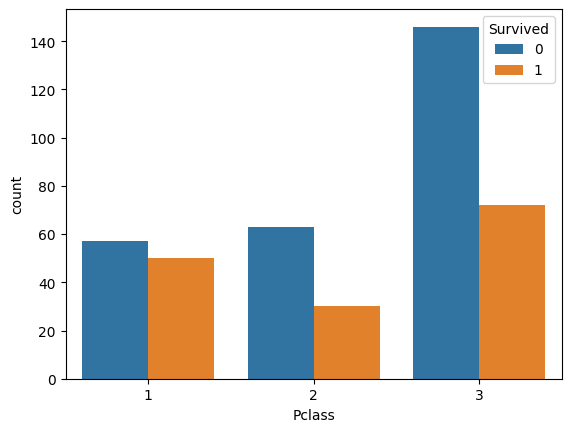

In [16]:
#Countplot of Pclass who survived or not 
sns.countplot(data = titanic,x= 'Pclass', hue = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

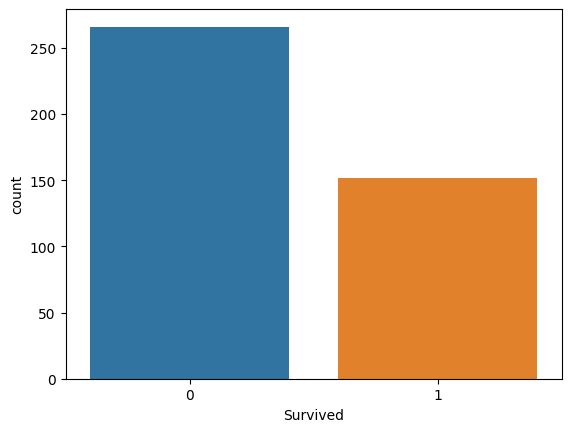

In [17]:
#Countplot for survived or not.
sns.countplot(data = titanic, x = 'Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

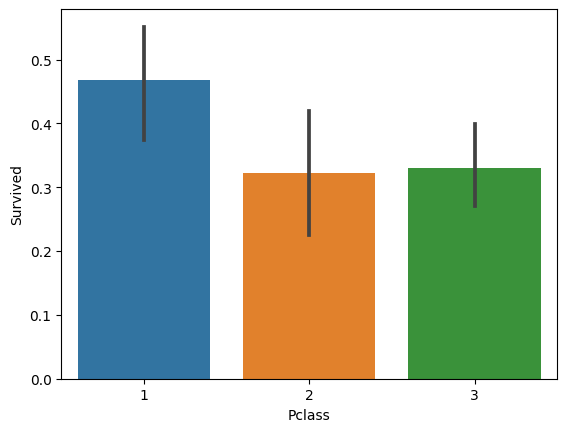

In [18]:
#Barplot for survival rate of each Pclass
sns.barplot(data = titanic, x = 'Pclass', y = 'Survived')

In [19]:
#Replace the categorical values with numeric values
titanic['Sex'].replace({'male': 0, 'female': 1}, inplace = True)
titanic['Embarked'].replace({'S': 0, 'C': 1 , 'Q': 2}, inplace = True)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


**Feature Engineering And Target Selection**

In [21]:
X = titanic.drop(['PassengerId','Name','Ticket','Fare','Survived'], axis = 1)
Y = titanic['Survived']

In [22]:
print(X,Y)

     Pclass  Sex       Age  SibSp  Parch  Embarked
0         3    0  34.50000      0      0         2
1         3    1  47.00000      1      0         0
2         2    0  62.00000      0      0         2
3         3    0  27.00000      0      0         0
4         3    1  22.00000      1      1         0
..      ...  ...       ...    ...    ...       ...
413       3    0  30.27259      0      0         0
414       1    1  39.00000      0      0         1
415       3    0  38.50000      0      0         0
416       3    0  30.27259      0      0         0
417       3    0  30.27259      1      1         1

[418 rows x 6 columns] 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [49]:
#Splitting of model into 80% training and 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)
print(X.shape, X_test.shape, X_train.shape)

(418, 6) (84, 6) (334, 6)


**Training and Evaluation of Model**

In [50]:
#Model training using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [51]:
X_train_pred = forest.predict(X_train)
X_test_pred = forest.predict(X_test)
print(X_train_pred)
print(X_test_pred)

[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1]
[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 0 0]


In [52]:
#Accuracy score for training and testing data
from sklearn.metrics import accuracy_score

training_acc = accuracy_score(Y_train, X_train_pred)
print(f'Training Data Accuracy is {training_acc}')

testing_acc = accuracy_score(Y_test, X_test_pred)
print(f'Testing Data Accuracy is {testing_acc}')


Training Data Accuracy is 1.0
Testing Data Accuracy is 1.0


In [60]:
#Prediction Model 
Survival = [3,0,34,0,0,2] 
data = np.asarray(Survival)
Survivalrate = data.reshape(1,-1)
pred = forest.predict(Survivalrate)
print(pred)

if pred == 0:
    print('Not Survived')
else:
    print('Survived')

[0]
Not Survived


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
